# PROYECTO N°2: MACHINE LEARNING

###    DESCRIPCIÓN DEL PROYECTO

El presente archivo es el paso a paso para la obtención de un modelo de ML que tenga la capacidad de predecir si la estadía de un paciente en el hospital, será mayor a 8 días o menor o igual a 8 días.

In [1]:
# Importamos librerías que serán utilizadas
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,  recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn import linear_model

### FEATURE ENGINEERING:

Importamos la data proporcionada y realizamos la exploración (EDA). Verificamos si los valores son categóricos o numéricos

In [2]:
# Deshabilitamos el limite de columnas mostradas
pd.options.display.max_columns = None

In [3]:
#Importamos la data para su exploracion
datatrain = pd.read_parquet('Datasets/train.parquet', engine='pyarrow')
datatrain.head(2)

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7048013474,https://boise.craigslist.org/apa/d/very-nice-b...,boise,https://boise.craigslist.org,1350,house,1200,2,2.0,1,1,1,0,0,0,w/d in unit,detached garage,https://images.craigslist.org/00B0B_cPiJMEheZe...,Super cute row house in the Boise bench area. ...,43.5851,-116.225,id
1,7043931179,https://cosprings.craigslist.org/apa/d/colorad...,colorado springs,https://cosprings.craigslist.org,1115,apartment,694,1,1.0,1,1,1,0,0,0,w/d in unit,carport,https://images.craigslist.org/00R0R_5XAoSKvfrz...,Windtree Apartment Homes currently has a spaci...,38.9137,-104.780,co


In [4]:
datatrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346479 entries, 0 to 346478
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       346479 non-null  int64  
 1   url                      346479 non-null  object 
 2   region                   346479 non-null  object 
 3   region_url               346479 non-null  object 
 4   price                    346479 non-null  int64  
 5   type                     346479 non-null  object 
 6   sqfeet                   346479 non-null  int64  
 7   beds                     346479 non-null  int64  
 8   baths                    346479 non-null  float64
 9   cats_allowed             346479 non-null  int64  
 10  dogs_allowed             346479 non-null  int64  
 11  smoking_allowed          346479 non-null  int64  
 12  wheelchair_access        346479 non-null  int64  
 13  electric_vehicle_charge  346479 non-null  int64  
 14  come

### EDA:
Exploramos cada columna

In [5]:
# Exploramos cada columna. Empezamos por la columna 1. id: Identificador del anuncio.
datatrain.iloc[:,0].value_counts()

7048013474    1
7049895035    1
7049927193    1
7032632294    1
7048383204    1
             ..
7049870733    1
7047319086    1
7051089316    1
7040007884    1
7049657819    1
Name: id, Length: 346479, dtype: int64

In [6]:
# Columna 2. url: Link web del anuncio.
datatrain.iloc[:,1].value_counts()

https://boise.craigslist.org/apa/d/very-nice-bench-house-for-rent/7048013474.html                     1
https://washingtondc.craigslist.org/nva/apa/d/herndon-2-bed-rentable-storage-units/7049895035.html    1
https://phoenix.craigslist.org/evl/apa/d/gilbert-one-bedroom-a-fireplace-lg/7049927193.html           1
https://wilmington.craigslist.org/apa/d/wilmington-new-home-before-the-holidays/7032632294.html       1
https://charleston.craigslist.org/apa/d/johns-island-granite-countertops-movie/7048383204.html        1
                                                                                                     ..
https://okaloosa.craigslist.org/apa/d/santa-rosa-beach-terra-mar-in-santa/7049870733.html             1
https://rmn.craigslist.org/apa/d/rochester-3-br-with-heat-included-in/7047319086.html                 1
https://oklahomacity.craigslist.org/apa/d/oklahoma-city-midwest-city-best-kept/7051089316.html        1
https://sarasota.craigslist.org/apa/d/sarasota-1-2-off-dec-rent-

In [7]:
# Columna 3. region: Región de Estados Unidos en donde se encuentra la propiedad.
datatrain.iloc[:,2].value_counts()

jacksonville      3849
columbus          3377
rochester         3324
jackson           3306
fayetteville      3295
                  ... 
southwest MS        11
southwest TX         9
st louis             9
fort smith, AR       5
kansas city          3
Name: region, Length: 404, dtype: int64

In [8]:
# Columna 4. region_url: Link web de los anuncios pertenecientes a la región.
datatrain.iloc[:,3].value_counts()

https://omaha.craigslist.org             2465
https://fredericksburg.craigslist.org    2464
https://saltlakecity.craigslist.org      2426
https://denver.craigslist.org            2425
https://fayetteville.craigslist.org      2381
                                         ... 
https://twintiers.craigslist.org           16
https://owensboro.craigslist.org           15
https://susanville.craigslist.org          14
https://natchez.craigslist.org             11
https://bigbend.craigslist.org              9
Name: region_url, Length: 413, dtype: int64

In [9]:
# Columna 5. price: Precio de la propiedad en dólares.
datatrain.iloc[:,4].unique()

array([1350, 1115, 1129, ..., 4756, 3221, 5015], dtype=int64)

In [10]:
# Columna 6. type: Tipo de propiedad.
datatrain.iloc[:,5].value_counts()

apartment          286303
house               29947
townhouse           14239
condo                5613
duplex               4539
manufactured         3819
cottage/cabin         770
loft                  616
flat                  470
in-law                153
land                    8
assisted living         2
Name: type, dtype: int64

In [11]:
# Columna 7. sqfeet: Metros cuadrados de la propiedad.
datatrain.iloc[:,6].value_counts()


1000    9135
900     7627
1100    6314
800     6205
700     6018
        ... 
3914       1
3101       1
123        1
3419       1
3516       1
Name: sqfeet, Length: 3193, dtype: int64

In [12]:
# Columna 8. beds: Cantidad de dormitorios.
datatrain.iloc[:,7].value_counts()

2       157944
1       105601
3        60300
4        10408
0         9842
5         2092
6          216
7           46
8           27
1000         2
1100         1
Name: beds, dtype: int64

In [13]:
# Columna 9. baths: Cantidad de baños.
datatrain.iloc[:,8].value_counts()

1.0     178365
2.0     121302
1.5      24533
2.5      11814
3.0       4966
0.0       2835
4.0       1355
3.5        896
4.5        211
5.0        114
5.5         51
6.0         25
6.5          4
7.0          2
25.0         1
7.5          1
35.0         1
8.0          1
8.5          1
75.0         1
Name: baths, dtype: int64

In [14]:
# Columna 10. cats_allowed: Si se permiten gatos en la propiedad toma el valor 1, 0 para caso contrario.
datatrain.iloc[:,9].unique()

array([1, 0], dtype=int64)

In [15]:
# Columna 11. dogs_allowed: Si se permiten perros en la propiedad toma el valor 1, 0 para caso contrario.
datatrain.iloc[:,10].unique()

array([1, 0], dtype=int64)

In [16]:
# Columna 12. smoking_allowed: Si se permite fumar en la propiedad toma el valor 1, 0 para caso contrario.
datatrain.iloc[:,11].value_counts()

1    253532
0     92947
Name: smoking_allowed, dtype: int64

In [17]:
# Columna 13. wheelchair_access: Si la propiedad posee acceso para sillas de ruedas toma el valor 1, 0 para caso contrario.
datatrain.iloc[:,12].value_counts()

0    318078
1     28401
Name: wheelchair_access, dtype: int64

In [18]:
# Columna 14. electric_vehicle_charge: Si la propiedad posee cargador para vehículos eléctricos toma el valor 1, 0 para caso contrario.
datatrain.iloc[:,13].value_counts()

0    342047
1      4432
Name: electric_vehicle_charge, dtype: int64

In [19]:
# Columna 15. comes_furnished: Si la propiedad viene amueblada toma el valor 1, 0 para caso contrario.
datatrain.iloc[:,14].value_counts()

0    329799
1     16680
Name: comes_furnished, dtype: int64

In [20]:
# Columna 16. laundry_options: Opciones de lavandería (w/d in unit: Lavadora/secadora en la propiedad, w/d hookups: 
# conexión para lavadora/secadora, laundry on site: servicio de lavandería en el lugar, laundry in bldg: 
# servicio de lavandería en el edificio, no laundry on sit: sin servicio de lavandería).
datatrain.iloc[:,15].value_counts()

w/d in unit           118627
w/d hookups            67941
laundry on site        52949
laundry in bldg        32513
no laundry on site      3278
Name: laundry_options, dtype: int64

In [21]:
# Columna 17. parking_options: Opciones de estacionamiento (off-street parking: zona de estacionamiento, 
# attached garage: garaje incluido, carport: cochera/garaje abierto, detached garage: garaje separado,
# street parking: estacionamiento delimitado en la calle, 
# no parking: sin estacionamiento, valet parking: estacionamiento con servicio valet).
datatrain.iloc[:,16].value_counts()

off-street parking    115612
attached garage        36428
carport                35048
detached garage        15314
street parking         14370
no parking              2882
valet parking            143
Name: parking_options, dtype: int64

In [22]:
# Columna 18. image_url: Link web de la imagen de la propiedad en el anuncio.
datatrain.iloc[:,17].value_counts()

https://images.craigslist.org/00R0R_ciYsssEFReq_600x450.jpg    363
https://images.craigslist.org/00q0q_bgmgyW6dLsd_600x450.jpg    345
https://images.craigslist.org/00X0X_XsEWPFYKuV_600x450.jpg     197
https://images.craigslist.org/01515_6IPWDkQhlPM_600x450.jpg    196
https://images.craigslist.org/00F0F_lD8FY29OOt4_600x450.jpg    196
                                                              ... 
https://images.craigslist.org/00m0m_9CJQRKgOE97_600x450.jpg      1
https://images.craigslist.org/00e0e_adxNPziRBFG_600x450.jpg      1
https://images.craigslist.org/00w0w_5hwofMx2HD6_600x450.jpg      1
https://images.craigslist.org/00f0f_iE2klsZWnEi_600x450.jpg      1
https://images.craigslist.org/00w0w_7irvBxq409N_600x450.jpg      1
Name: image_url, Length: 168246, dtype: int64

In [23]:
# Columna 19. description: Descripción de la propiedad puesta en el anuncio.
datatrain.iloc[:,18].info()

<class 'pandas.core.series.Series'>
RangeIndex: 346479 entries, 0 to 346478
Series name: description
Non-Null Count   Dtype 
--------------   ----- 
346477 non-null  object
dtypes: object(1)
memory usage: 2.6+ MB


In [24]:
# Columna 20. lat: Latitud.
datatrain.iloc[:,19].value_counts()

29.8754    1200
32.4779     714
39.4242     690
35.1653     607
30.3659     554
           ... 
28.9589       1
30.6253       1
48.1201       1
34.1697       1
42.8997       1
Name: lat, Length: 53822, dtype: int64

In [25]:
# Columna 21. long: Longitud.
datatrain.iloc[:,20].value_counts()

-97.9404     1188
-84.8980      713
-77.4597      676
-101.8840     588
-90.2309      583
             ... 
-89.0394        1
-79.9926        1
-80.3782        1
-73.0333        1
-70.8932        1
Name: long, Length: 51129, dtype: int64

In [26]:
# Columna 22. state: Código del estado al que pertenece la propiedad.​
datatrain.iloc[:,21].unique()

array(['id', 'co', 'va', 'az', 'tn', 'tx', 'ma', 'ks', 'pa', 'me', 'ms',
       'la', 'mn', 'ky', 'wa', 'al', 'ca', 'ga', 'nc', 'md', 'ia', 'fl',
       'or', 'ar', 'hi', 'nj', 'ut', 'wv', 'ny', 'sc', 'oh', 'mo', 'mi',
       'ak', 'sd', 'ok', 'dc', 'in', 'ct', 'ri', 'ne', 'nd', 'nv', 'wi',
       'nh', 'de', 'il', 'nm', 'mt', 'vt', 'wy'], dtype=object)

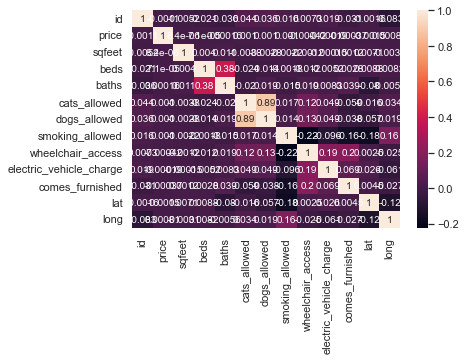

In [27]:
# Generamos un heatmap para verificar las correlaciones
corr = datatrain.corr()
sns.set(rc = {'figure.figsize':(30,30)})
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot=True);

## FEATURE ENCODING:

Las columnas que poseen datos categóricos, los convertimos a numéricos

In [28]:
# Convertimos los precios de la columna "price" a 1 para precios "low" menores a 1000 y 0 para precios mayores o iguales a 1000
bins = [-1,999,5015]
labels = [1,0]
precio = pd.cut(datatrain["price"], bins , labels = labels)
datatrain["precio"] = precio
datatrain.head(3)

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state,precio
0,7048013474,https://boise.craigslist.org/apa/d/very-nice-b...,boise,https://boise.craigslist.org,1350,house,1200,2,2.0,1,1,1,0,0,0,w/d in unit,detached garage,https://images.craigslist.org/00B0B_cPiJMEheZe...,Super cute row house in the Boise bench area. ...,43.5851,-116.2250,id,0
1,7043931179,https://cosprings.craigslist.org/apa/d/colorad...,colorado springs,https://cosprings.craigslist.org,1115,apartment,694,1,1.0,1,1,1,0,0,0,w/d in unit,carport,https://images.craigslist.org/00R0R_5XAoSKvfrz...,Windtree Apartment Homes currently has a spaci...,38.9137,-104.7800,co,0
2,7048254516,https://norfolk.craigslist.org/apa/d/virginia-...,norfolk / hampton roads,https://norfolk.craigslist.org,1129,apartment,900,2,2.0,0,0,1,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00f0f_3ZbTFrsHpZ...,Call Today! show contact info Indian Lakes ...,36.7922,-76.1643,va,0


In [29]:
datatrain1=datatrain['price']==1000
datatrain[datatrain1].head(2)

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state,precio
206,7032105672,https://savannah.craigslist.org/apa/d/savannah...,savannah / hinesville,https://savannah.craigslist.org,1000,apartment,586,1,1.0,1,1,1,0,0,0,None,off-street parking,https://images.craigslist.org/00h0h_ailRjMGgw1...,To schedule a tour We now book our tour appoin...,32.0139,-81.2397,ga,0
233,7032228499,https://lawrence.craigslist.org/apa/d/lawrence...,lawrence,https://lawrence.craigslist.org,1000,duplex,1100,2,1.5,1,1,1,0,0,0,w/d hookups,attached garage,https://images.craigslist.org/00u0u_iBktbeHi4u...,2 BEDROOM Plus OFFICE SPACE 1.5 BATHROOMS 1 CA...,38.9367,-95.2855,ks,0


In [30]:
# Observamos que la columna "precio" de 1s y 0s es tipo categoría, por lo tanto, lo
# convertimos a "int"
datatrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346479 entries, 0 to 346478
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   id                       346479 non-null  int64   
 1   url                      346479 non-null  object  
 2   region                   346479 non-null  object  
 3   region_url               346479 non-null  object  
 4   price                    346479 non-null  int64   
 5   type                     346479 non-null  object  
 6   sqfeet                   346479 non-null  int64   
 7   beds                     346479 non-null  int64   
 8   baths                    346479 non-null  float64 
 9   cats_allowed             346479 non-null  int64   
 10  dogs_allowed             346479 non-null  int64   
 11  smoking_allowed          346479 non-null  int64   
 12  wheelchair_access        346479 non-null  int64   
 13  electric_vehicle_charge  346479 non-null  in

In [31]:
# Verificamos que la columna "precio" es tipo "int"
datatrain["precio"]=pd.factorize(datatrain["precio"])[0]
datatrain.precio.info()

<class 'pandas.core.series.Series'>
RangeIndex: 346479 entries, 0 to 346478
Series name: precio
Non-Null Count   Dtype
--------------   -----
346479 non-null  int64
dtypes: int64(1)
memory usage: 2.6 MB


COLUMNA 1: id: Identificador del anuncio.

In [32]:
# Eliminamos: Datos únicos, no tiene relevancia en el precio, no es más que un identificador.
datatrain=datatrain.drop(columns=["id"])

COLUMNA 2: url: Link web del anuncio.

In [33]:
# Eliminamos: Datos únicos, no tiene relevancia en el precio, solo son urls web.
datatrain=datatrain.drop(columns=["url"])
#enc = OneHotEncoder(sparse=False)
#departamentos=datatrain["Department"].values.reshape(-1,1)
#enc.fit(departamentos)
#enc2=enc.transform(departamentos)
#print(enc.categories_)
#datatrain["Department_TB & Chest disease"]=enc2[:,0]
#datatrain["Department_anesthesia"]=enc2[:,1]
#datatrain["Department_gynecology"]=enc2[:,2]
#datatrain["Department_radiotherapy"]=enc2[:,3]
#datatrain["Department_surgery"]=enc2[:,4]


COLUMNA 3: region: Región de Estados Unidos en donde se encuentra la propiedad.

In [34]:
# La región donde se encuentra una propiedad generalmente si tiene impacto en el precio, son 404 regiones
reg_enc = LabelEncoder().fit(datatrain['region'])
datatrain["reg"] = reg_enc.transform(datatrain['region'])

In [35]:
# Eliminamos la columna "region"
datatrain=datatrain.drop(columns=["region"])

COLUMNA 4: region_url: Link web de los anuncios pertenecientes a la región.

In [36]:
# Hay portales que se repiten para diferentes propiedades, el tráfico en cada una de estas webs
# podría influir en el precio, por demanda.

url_enc = LabelEncoder().fit(datatrain['region_url'])
datatrain["regurl"] = url_enc.transform(datatrain['region_url'])


In [37]:
# Eliminamos la columna "region_url"
datatrain=datatrain.drop(columns=["region_url"])

COLUMNA 6: type: Tipo de propiedad.

In [38]:
# El tipo de propiedad si tiene relevancia en el precio de estas.

enc = OneHotEncoder(sparse=False)
departamentos=datatrain["type"].values.reshape(-1,1)
enc.fit(departamentos)
enc2=enc.transform(departamentos)
print(enc.categories_)
datatrain["type_apartment"]=enc2[:,0]
datatrain["type_assisted living"]=enc2[:,1]
datatrain["type_condo"]=enc2[:,2]
datatrain["type_cottage/cabin"]=enc2[:,3]
datatrain["type_duplex"]=enc2[:,4]
datatrain["type_flat"]=enc2[:,5]
datatrain["type_house"]=enc2[:,6]
datatrain["type_in-law"]=enc2[:,7]
datatrain["type_land"]=enc2[:,8]
datatrain["type_loft"]=enc2[:,9]
datatrain["type_manufactured"]=enc2[:,10]
datatrain["type_townhouse"]=enc2[:,11]

[array(['apartment', 'assisted living', 'condo', 'cottage/cabin', 'duplex',
       'flat', 'house', 'in-law', 'land', 'loft', 'manufactured',
       'townhouse'], dtype=object)]


In [39]:
# Eliminamos la columna "type"
datatrain=datatrain.drop(columns=["type"])


In [40]:
# Eliminamos el tipo que no existe en test
datatrain=datatrain.drop(columns=["type_assisted living"])


In [41]:
datatrain=datatrain.drop(columns=["type_land"])

COLUMNA 7: sqfeet: Metros cuadrados de la propiedad.

In [42]:
# Este parametro tiene relevancia en el precio de la propiedad. Hacemos standarscale
scale = StandardScaler()
convert=datatrain["sqfeet"].values.reshape(-1,1)
datatrain["sqfeet"] = scale.fit_transform(convert)

COLUMNA 8: beds: Cantidad de dormitorios.

In [43]:
# La cantidad de dormitorios si es relevante en el precio de la propiedad, 0 a 8, 
# outliers 1000 y 1100

datatrain.beds.value_counts()


2       157944
1       105601
3        60300
4        10408
0         9842
5         2092
6          216
7           46
8           27
1000         2
1100         1
Name: beds, dtype: int64

COLUMNA 9: baths: Cantidad de baños.

In [44]:
# La cantidad de baños es relevante en el precio de la propiedad, 0 a 8.5, outl 25, 35, 75
datatrain.baths.value_counts()

1.0     178365
2.0     121302
1.5      24533
2.5      11814
3.0       4966
0.0       2835
4.0       1355
3.5        896
4.5        211
5.0        114
5.5         51
6.0         25
6.5          4
7.0          2
25.0         1
7.5          1
35.0         1
8.0          1
8.5          1
75.0         1
Name: baths, dtype: int64

COLUMNAS 10, 11, 12, 13, 14 y 15 mantenemos en 0 y 1

COLUMNA 16: laundry_options: Opciones de lavandería.

In [45]:
# Son parametros relevantes para el precio de la propiedad.
enc = OneHotEncoder(sparse=False)
condicion=datatrain["laundry_options"].values.reshape(-1,1)
enc.fit(condicion)
enc2=enc.transform(condicion)
print(enc.categories_)
datatrain["opt_laundry in bldg"]=enc2[:,0]
datatrain["opt_laundry on site"]=enc2[:,1]
datatrain["opt_no laundry on site"]=enc2[:,2]
datatrain["opt_w/d hookups"]=enc2[:,3]
datatrain["opt_w/d in unit"]=enc2[:,4]
datatrain["opt_None"]=enc2[:,5]


[array(['laundry in bldg', 'laundry on site', 'no laundry on site',
       'w/d hookups', 'w/d in unit', None], dtype=object)]


In [46]:
# Eliminamos la columna "laundry_options"
datatrain=datatrain.drop(columns=["laundry_options"])

COLUMMNA 17: parking_options: Opciones de estacionamiento.

In [47]:
# Son parametros relevantes para el precio de la propiedad.

enc = OneHotEncoder(sparse=False)
condicion=datatrain["parking_options"].values.reshape(-1,1)
enc.fit(condicion)
enc2=enc.transform(condicion)
print(enc.categories_)
datatrain["park_attached garage"]=enc2[:,0]
datatrain["park_carport"]=enc2[:,1]
datatrain["park_detached garage"]=enc2[:,2]
datatrain["park_no parking"]=enc2[:,3]
datatrain["park_off-street parking"]=enc2[:,4]
datatrain["park_street parking"]=enc2[:,5]
datatrain["park_valet parking"]=enc2[:,6]
datatrain["park_None"]=enc2[:,7]

[array(['attached garage', 'carport', 'detached garage', 'no parking',
       'off-street parking', 'street parking', 'valet parking', None],
      dtype=object)]


In [48]:
# Eliminamos la columna "parking_options"
datatrain=datatrain.drop(columns=["parking_options"])

COLUMMNA 18: image_url: Link web de la imagen de la propiedad en el anuncio.

In [49]:
# No es un dato relevante para la determinación del precio de la propiedad
datatrain=datatrain.drop(columns=["image_url"])

COLUMNA 19: description: Descripción de la propiedad puesta en el anuncio.

In [50]:
# No es un dato relevante para la determinación del precio de la propiedad
datatrain=datatrain.drop(columns=["description"])

COLUMNA 20 y 21. Latitud y Longitud, no los consideramos como datos relevantes

In [51]:
# Eliminamos los campos "lat" y "long"
datatrain=datatrain.drop(columns=["lat","long"])

COLUMNA 22. state: Código del estado al que pertenece la propiedad.​

In [52]:
# El estado al que pertenece la propiedad si tiene relevancia en el precio de la propiedad
st_enc = LabelEncoder().fit(datatrain['state'])
datatrain["estado"] = st_enc.transform(datatrain['state'])

In [53]:
# Eliminamos la columna "state"
datatrain=datatrain.drop(columns=["state"])

In [54]:
datatrain.head(2)

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,precio,reg,regurl,type_apartment,type_condo,type_cottage/cabin,type_duplex,type_flat,type_house,type_in-law,type_loft,type_manufactured,type_townhouse,opt_laundry in bldg,opt_laundry on site,opt_no laundry on site,opt_w/d hookups,opt_w/d in unit,opt_None,park_attached garage,park_carport,park_detached garage,park_no parking,park_off-street parking,park_street parking,park_valet parking,park_None,estado
0,1350,0.006622,2,2.0,1,1,1,0,0,0,0,33,38,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,13
1,1115,-0.018445,1,1.0,1,1,1,0,0,0,0,64,79,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5


GENERAMOS DATA_X Y DATA_Y PARA EL MODELO DE ENTRENAMIENTO


In [55]:
# Generamos data_x
data_x=datatrain.drop(columns=["price","precio"])

In [56]:
# Generamos la datax sin la columna "Stay"
data_y=datatrain["precio"]

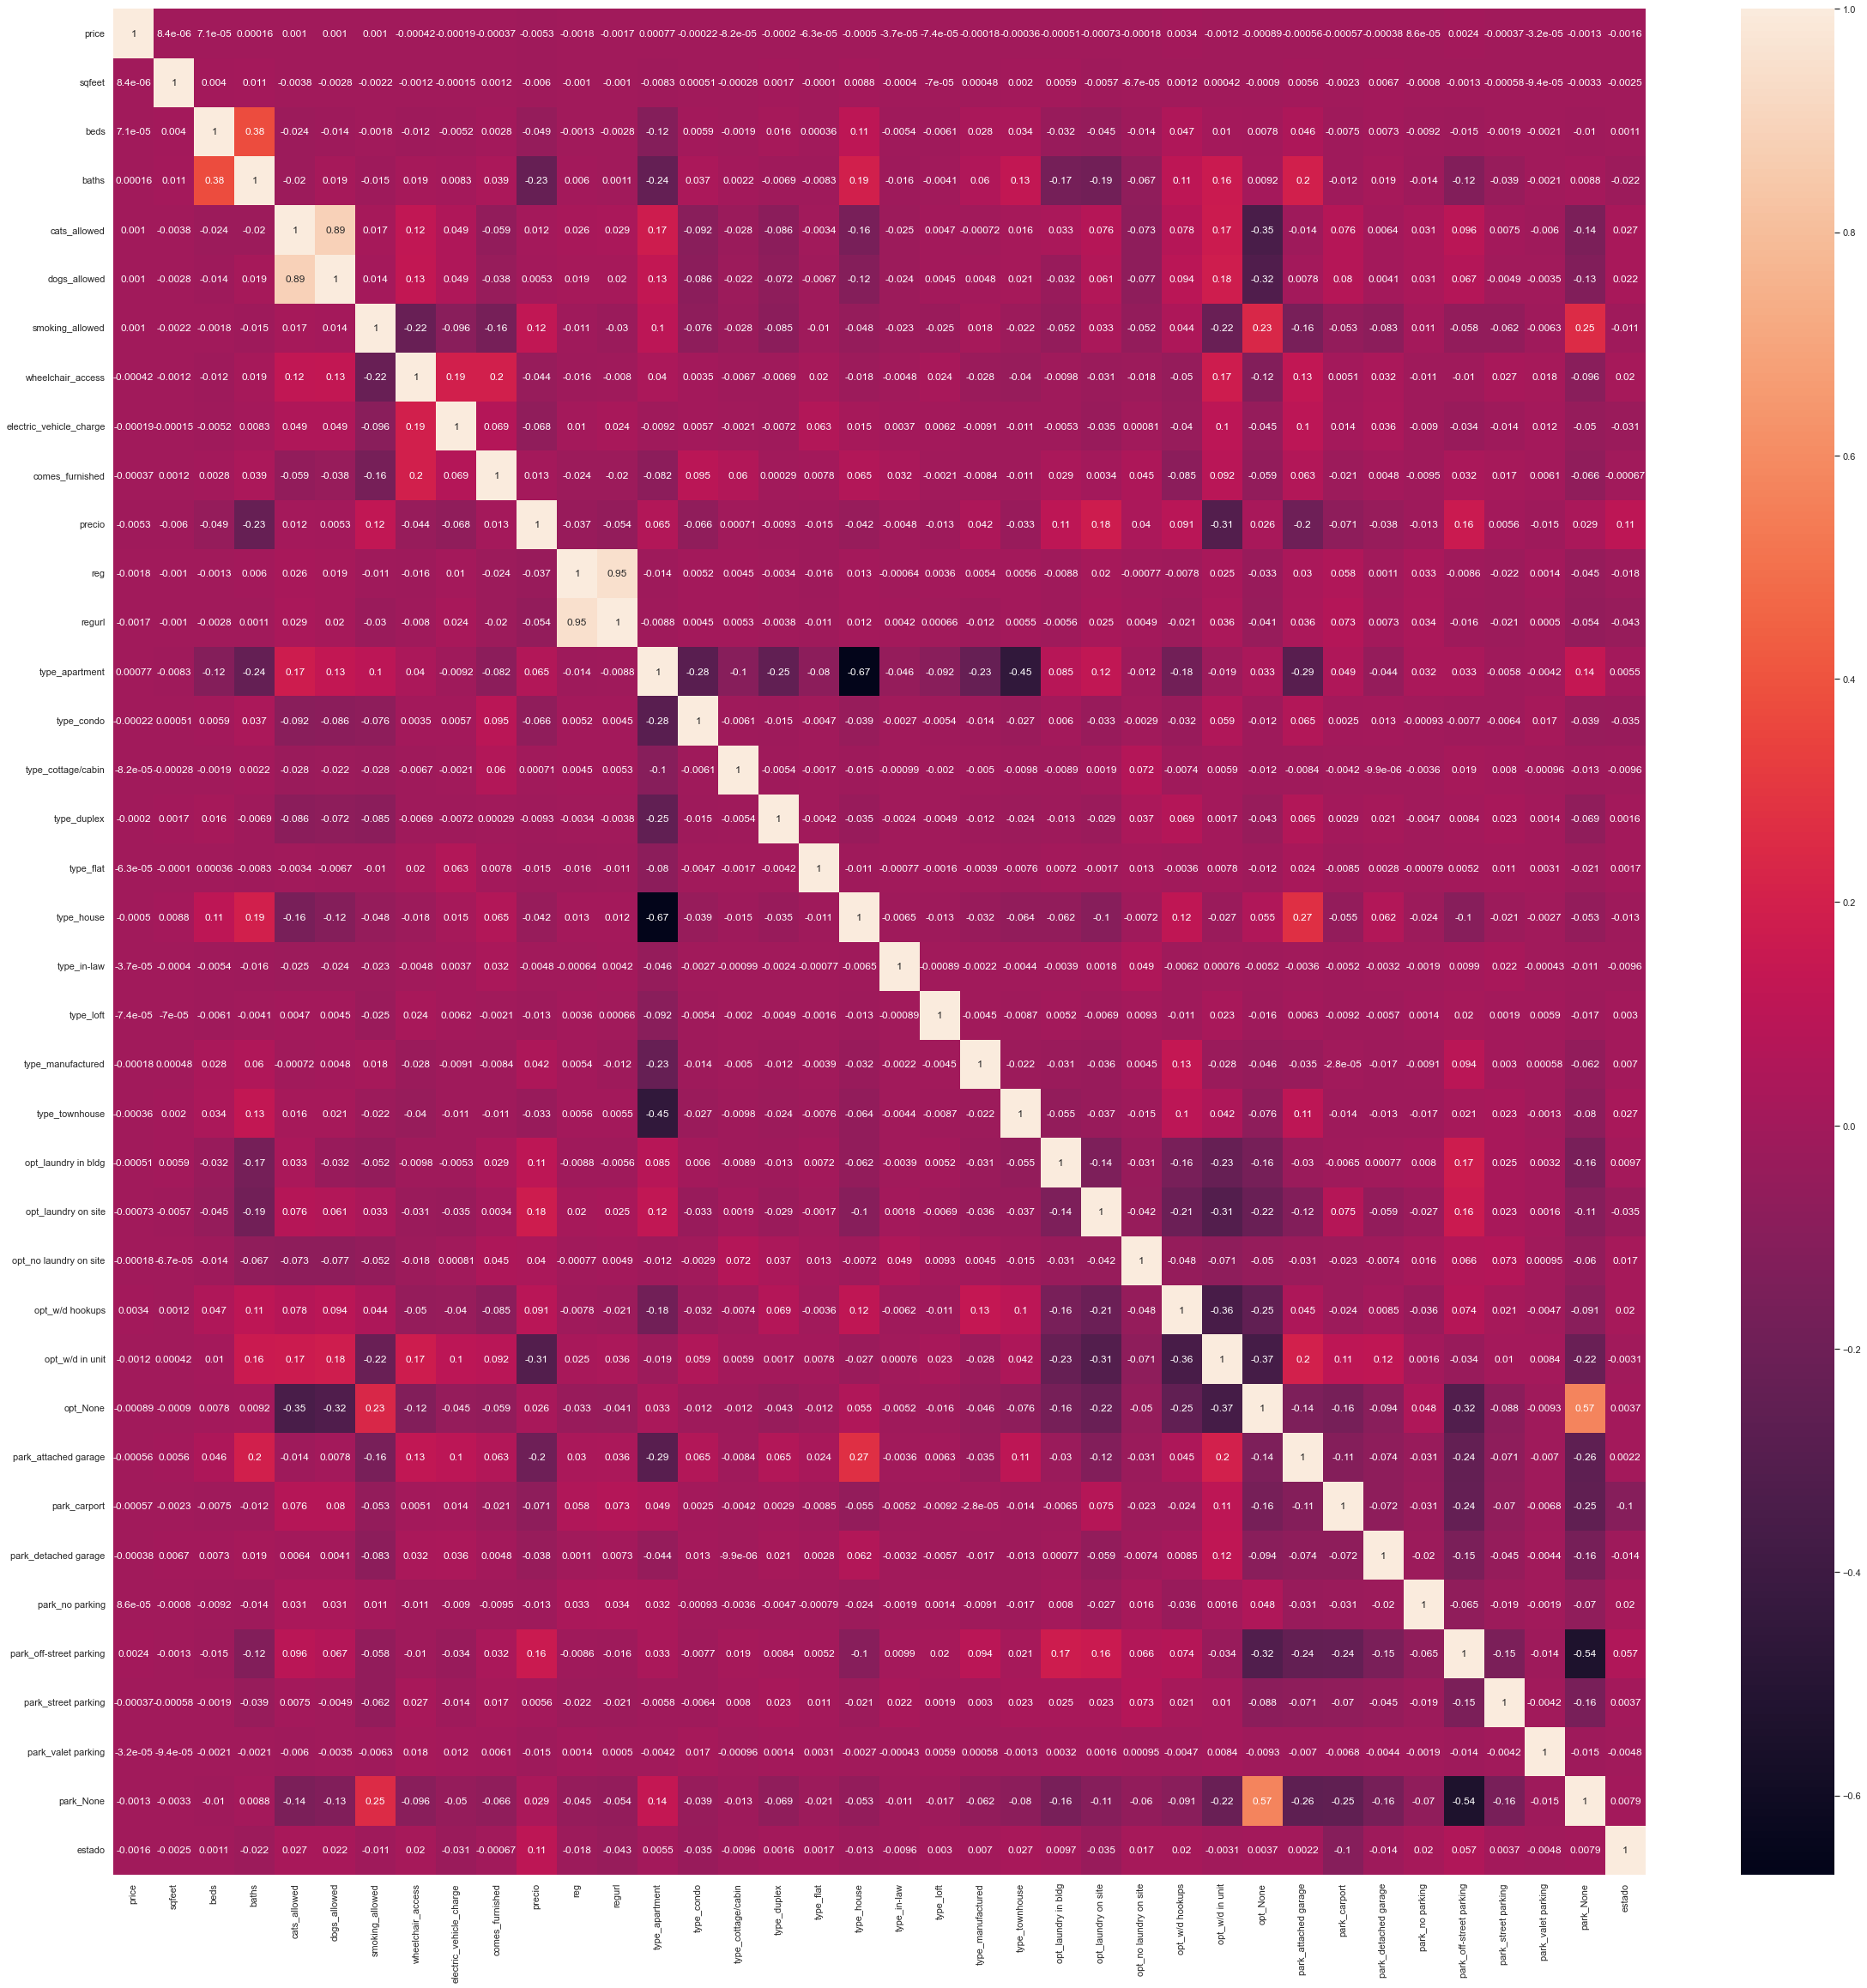

In [57]:
# Generamos un heatmap para verificar las correlaciones
corr = datatrain.corr()
sns.set(rc = {'figure.figsize':(40,40)})
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot=True);

## REPETIMOS EL PROCESO CON LA DATA_TEST:

Realizamos los mismos pasos que para la datatrain

In [58]:
#Importamos la data para su exploracion
data_test = pd.read_parquet('Datasets/test.parquet', engine='pyarrow')
data_test.head(2)

,id,url,region,region_url,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7037609789,https://annarbor.craigslist.org/apa/d/wixom-ho...,ann arbor,https://annarbor.craigslist.org,manufactured,1344,3,2.0,0,0,1,0,0,0,w/d in unit,off-street parking,https://images.craigslist.org/00M0M_iNczP1nzIL...,"OPEN HOUSE TODAY! APPLY THIS WEEK, PUT A HOLDI...",42.5333,-83.5763,mi
1,7032406876,https://vermont.craigslist.org/apa/d/randolph-...,vermont,https://vermont.craigslist.org,apartment,1050,2,1.0,0,0,1,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00L0L_ecirmYBIzL...,"Think of it, you'll be first to get your mail....",43.9393,-72.5538,vt


In [59]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38498 entries, 0 to 38497
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       38498 non-null  int64  
 1   url                      38498 non-null  object 
 2   region                   38498 non-null  object 
 3   region_url               38498 non-null  object 
 4   type                     38498 non-null  object 
 5   sqfeet                   38498 non-null  int64  
 6   beds                     38498 non-null  int64  
 7   baths                    38498 non-null  float64
 8   cats_allowed             38498 non-null  int64  
 9   dogs_allowed             38498 non-null  int64  
 10  smoking_allowed          38498 non-null  int64  
 11  wheelchair_access        38498 non-null  int64  
 12  electric_vehicle_charge  38498 non-null  int64  
 13  comes_furnished          38498 non-null  int64  
 14  laundry_options       

In [60]:
# Columna 1
data_test=data_test.drop(columns=["id"])

In [61]:
# Columna 2
data_test=data_test.drop(columns=["url"])

In [62]:
# Columna 3
reg_enc = LabelEncoder().fit(data_test['region'])
data_test["reg"] = reg_enc.transform(data_test['region'])

In [63]:
# Eliminamos la columna "region"
data_test=data_test.drop(columns=["region"])

In [64]:
# Columna 4
url_enc = LabelEncoder().fit(data_test['region_url'])
data_test["regurl"] = url_enc.transform(data_test['region_url'])
# Eliminamos la columna "region_url"
data_test=data_test.drop(columns=["region_url"])

In [65]:
# Columna 6
enc = OneHotEncoder(sparse=False)
departamentos=data_test["type"].values.reshape(-1,1)
enc.fit(departamentos)
enc2=enc.transform(departamentos)
print(enc.categories_)
data_test["type_apartment"]=enc2[:,0]
data_test["type_condo"]=enc2[:,1]
data_test["type_cottage/cabin"]=enc2[:,2]
data_test["type_duplex"]=enc2[:,3]
data_test["type_flat"]=enc2[:,4]
data_test["type_house"]=enc2[:,5]
data_test["type_in-law"]=enc2[:,6]
data_test["type_loft"]=enc2[:,7]
data_test["type_manufactured"]=enc2[:,8]
data_test["type_townhouse"]=enc2[:,9]
# Eliminamos campo "type"
data_test=data_test.drop(columns=["type"])

[array(['apartment', 'condo', 'cottage/cabin', 'duplex', 'flat', 'house',
       'in-law', 'loft', 'manufactured', 'townhouse'], dtype=object)]


In [66]:
# Columna 7
scale = StandardScaler()
convert=data_test["sqfeet"].values.reshape(-1,1)
data_test["sqfeet"] = scale.fit_transform(convert)

In [67]:
# Columnas 8 a 15 no se modifican

In [68]:
# Columna 16
enc = OneHotEncoder(sparse=False)
condicion=data_test["laundry_options"].values.reshape(-1,1)
enc.fit(condicion)
enc2=enc.transform(condicion)
print(enc.categories_)
data_test["opt_laundry in bldg"]=enc2[:,0]
data_test["opt_laundry on site"]=enc2[:,1]
data_test["opt_no laundry on site"]=enc2[:,2]
data_test["opt_w/d hookups"]=enc2[:,3]
data_test["opt_w/d in unit"]=enc2[:,4]
data_test["opt_None"]=enc2[:,5]

[array(['laundry in bldg', 'laundry on site', 'no laundry on site',
       'w/d hookups', 'w/d in unit', None], dtype=object)]


In [69]:
# Eliminamos
data_test=data_test.drop(columns=["laundry_options"])

In [70]:
# Columna 17
enc = OneHotEncoder(sparse=False)
condicion=data_test["parking_options"].values.reshape(-1,1)
enc.fit(condicion)
enc2=enc.transform(condicion)
print(enc.categories_)
data_test["park_attached garage"]=enc2[:,0]
data_test["park_carport"]=enc2[:,1]
data_test["park_detached garage"]=enc2[:,2]
data_test["park_no parking"]=enc2[:,3]
data_test["park_off-street parking"]=enc2[:,4]
data_test["park_street parking"]=enc2[:,5]
data_test["park_valet parking"]=enc2[:,6]
data_test["park_None"]=enc2[:,7]

[array(['attached garage', 'carport', 'detached garage', 'no parking',
       'off-street parking', 'street parking', 'valet parking', None],
      dtype=object)]


In [71]:
# Eliminamos
data_test=data_test.drop(columns=["parking_options"])

In [72]:
# Columna 18, 19, 20, 21
data_test=data_test.drop(columns=["image_url","description","lat","long"])

In [73]:
# Columna 22
st_enc = LabelEncoder().fit(data_test['state'])
data_test["estado"] = st_enc.transform(data_test['state'])
# Eliminamos
data_test=data_test.drop(columns=["state"])

In [74]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38498 entries, 0 to 38497
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sqfeet                   38498 non-null  float64
 1   beds                     38498 non-null  int64  
 2   baths                    38498 non-null  float64
 3   cats_allowed             38498 non-null  int64  
 4   dogs_allowed             38498 non-null  int64  
 5   smoking_allowed          38498 non-null  int64  
 6   wheelchair_access        38498 non-null  int64  
 7   electric_vehicle_charge  38498 non-null  int64  
 8   comes_furnished          38498 non-null  int64  
 9   reg                      38498 non-null  int32  
 10  regurl                   38498 non-null  int32  
 11  type_apartment           38498 non-null  float64
 12  type_condo               38498 non-null  float64
 13  type_cottage/cabin       38498 non-null  float64
 14  type_duplex           

## ENTRENAMIENTO Y MODELADO DE LA DATA:

Seleccionamos un 70% de la data para generar nuestra muestra de entrenamiento

In [75]:
from sklearn.model_selection import train_test_split
# Dejamos 30% de data para entrenamiento
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.30, random_state=42)

### 1. REGRESIÓN LOGÍSTICA

In [76]:
# Importamos la clase que contiene el algoritmo de regresíon logística

from sklearn.linear_model import LogisticRegression

# Instanciamos el modelo y lo entrenamos

clf1 = LogisticRegression()

# Lo entrenamos

clf1.fit(x_train,y_train)

c:\Users\Rafae\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [78]:
from sklearn.metrics import accuracy_score 

# Predecimos

y_pred1 = clf1.predict(x_test)

# Evaluamos

print('Accuracy del modelo es:', accuracy_score(y_test, y_pred1))
print('Recall del modelo es:', recall_score(y_test, y_pred1))

Accuracy del modelo es: 0.6837816516585854


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

### 2. VECINOS MÁS CERCANOS

In [79]:
from sklearn.neighbors import KNeighborsClassifier

# Instanciamos un objeto de la clase KNeighborsClassifier

clf2 = KNeighborsClassifier()

In [80]:
# Entrenamos

clf2.fit(x_train,y_train)

KNeighborsClassifier()

In [81]:
# Predecimos
y_pred2 = clf2.predict(x_test)

In [82]:
# Evaluamos
print("El accuracy del modelo es: ", accuracy_score(y_test,y_pred2))
print("El recall del modelo es: ", recall_score(y_test,y_pred2))

El accuracy del modelo es:  0.9174170707303932


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

### 3. ÁRBOL DE DECISIÓN

In [83]:
from sklearn.tree import DecisionTreeClassifier
# Instanciamos el árbol
tree0 = DecisionTreeClassifier(max_depth = None)
tree0.fit(x_train, y_train)

DecisionTreeClassifier()

In [84]:
# Predecimos
y0 = tree0.predict(x_test)
# Evaluamos
print("El accuracy del modelo es: ", accuracy_score(y_test,y0))
print("El recall del modelo es: ", recall_score(y_test,y0))

El accuracy del modelo es:  0.9211209882244286


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

### SELECCIÓN DEL MEJOR MODELO:

El mejor modelo es generado con el árbol de decisión. Procedemos a generar el archivo "pred"

In [85]:
# Predecimos para la data_test
y0test = tree0.predict(data_test)

In [86]:
# Generamos el dataframe con los valores obtenidos
y0test_csv=pd.DataFrame(list(y0test),columns=["pred"])

In [87]:
# Verificamos que posea los 90000 registros
y0test_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38498 entries, 0 to 38497
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   pred    38498 non-null  int64
dtypes: int64(1)
memory usage: 300.9 KB


In [88]:
# Creamos el archivo "csv"
y0test_csv.to_csv("pred/rafael1294.csv",index=False)